In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil, sqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
img = cv2.imread("Images/4/Lena.bmp", cv2.IMREAD_GRAYSCALE)

In [3]:
def imshow(*args, figsize=25, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1])
        plt.axis('off')

In [4]:
def fourier_transform(image):
    fft = np.fft.fftshift(np.fft.fft2(image))
    magnitude, phase = np.abs(fft), np.angle(fft)
    return magnitude, phase

In [5]:
def inverse_fourier_transform(magnitude, phase):
    real = np.cos(phase) * magnitude
    imag = np.sin(phase) * magnitude
    fft = real + (1j * imag)
    image = np.fft.ifft2(np.fft.ifftshift(fft))
    image = np.real(image)
    image = image.clip(min=0, max=255).astype('uint8')
    return image

In [6]:
def normalize(image, rmin=0, rmax=255, to_uint=True):
    norm = ((image - image.min()) / (image.max() - image.min())) * (rmax - rmin) + rmin
    if to_uint:
        norm = norm.astype('uint8')
    return norm

In [7]:
def visualize_magnitude(magnitude):
    return normalize(20 * np.log(magnitude))

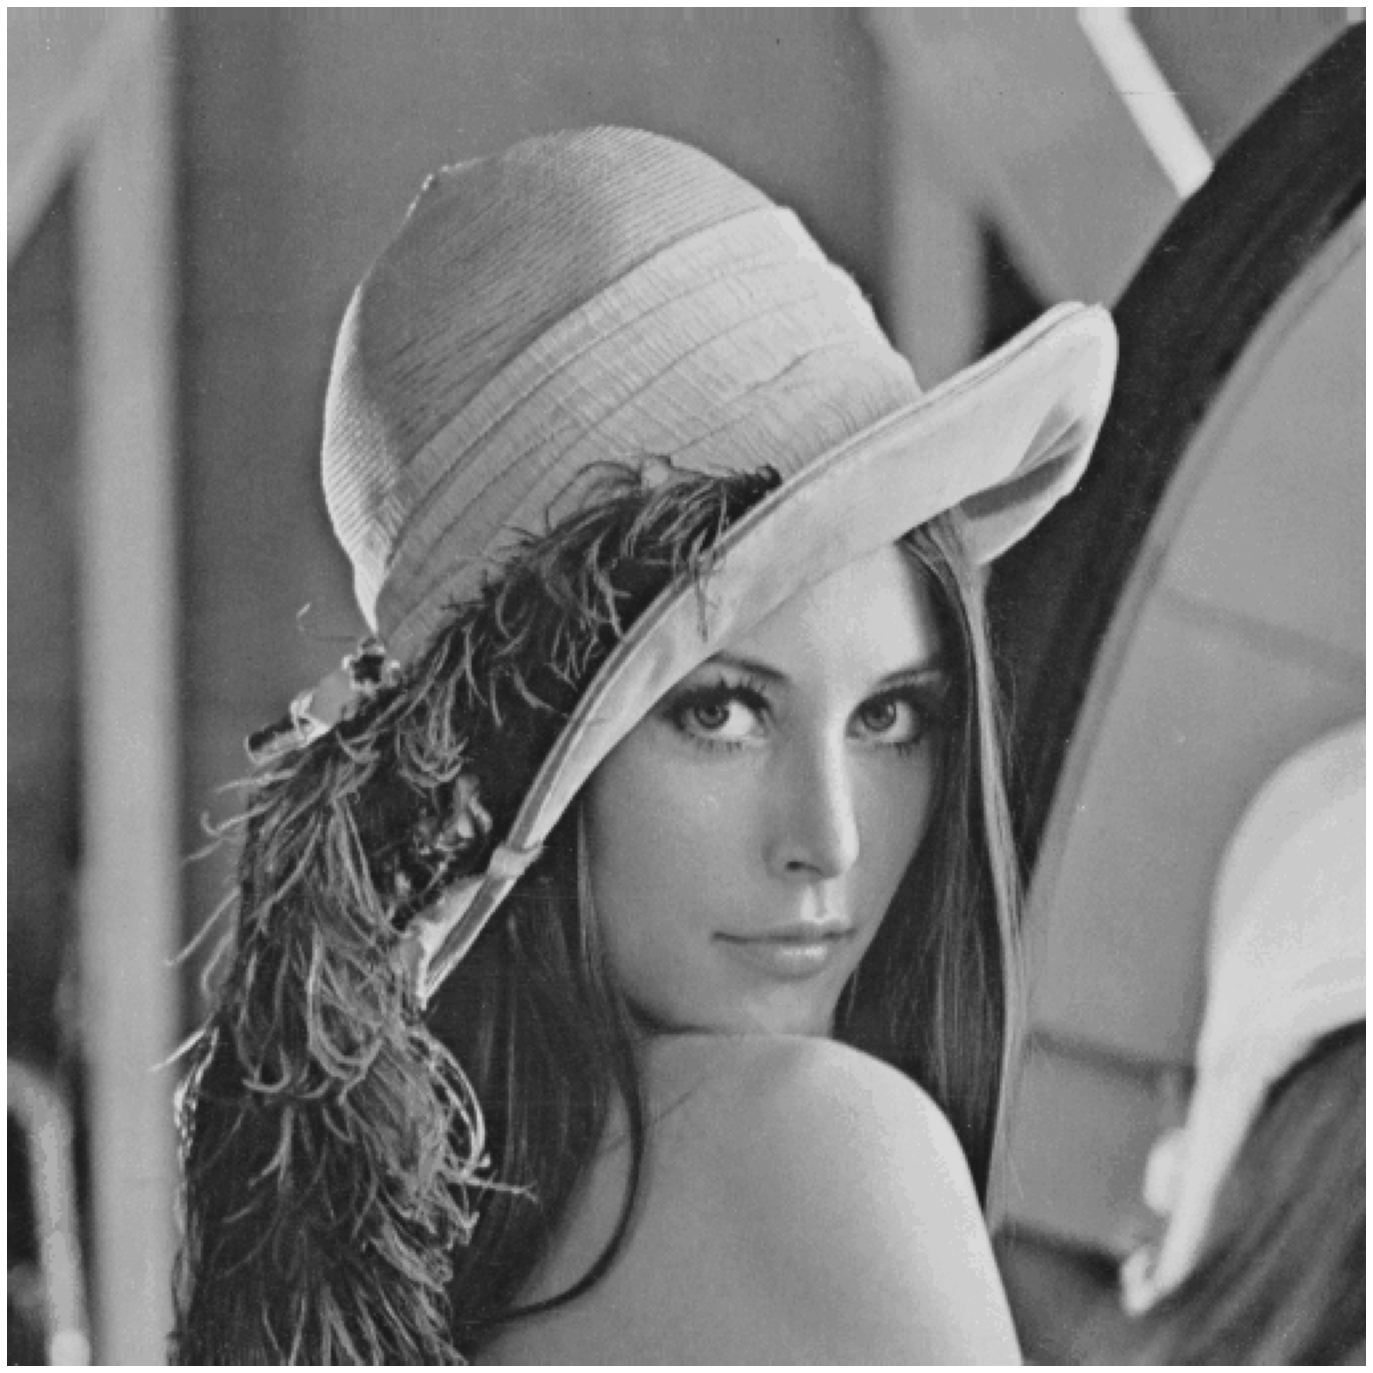

In [8]:
imshow(img)

# 4.1.1

In [9]:
mag, phase = fourier_transform(img)
mag_visual = visualize_magnitude(mag)

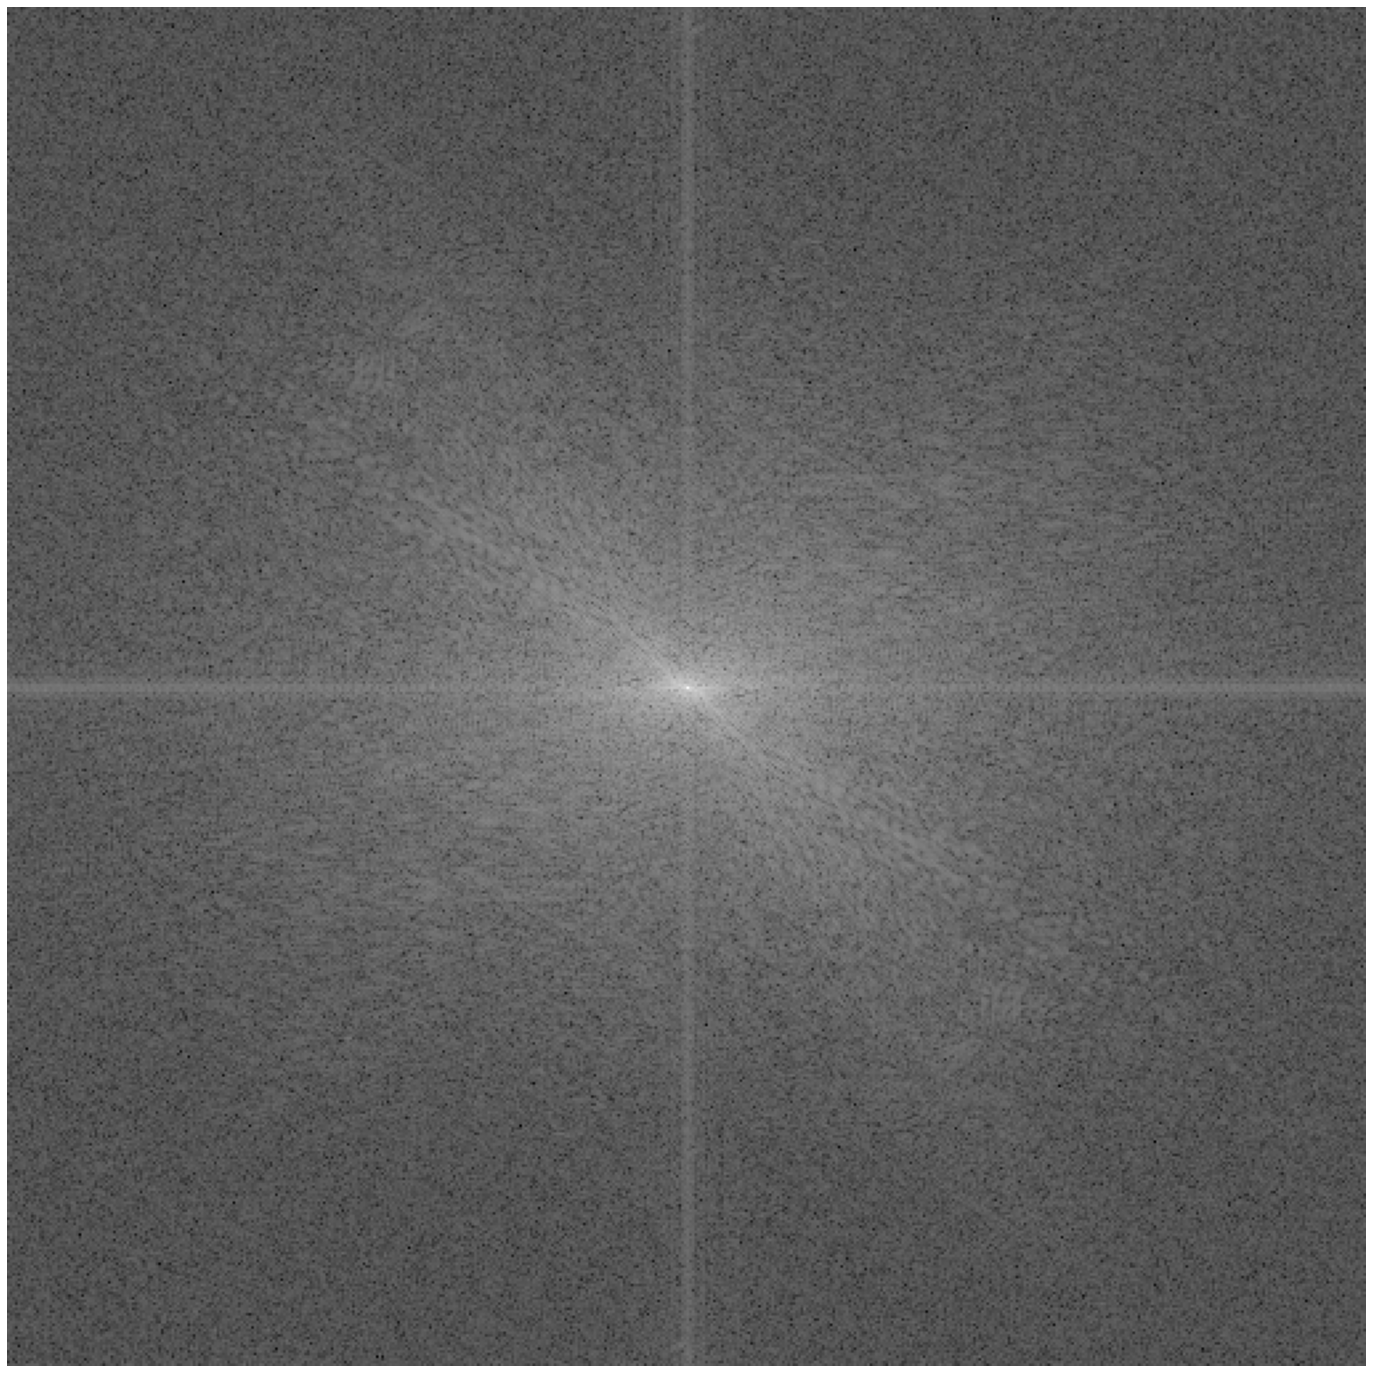

In [10]:
imshow(mag_visual)

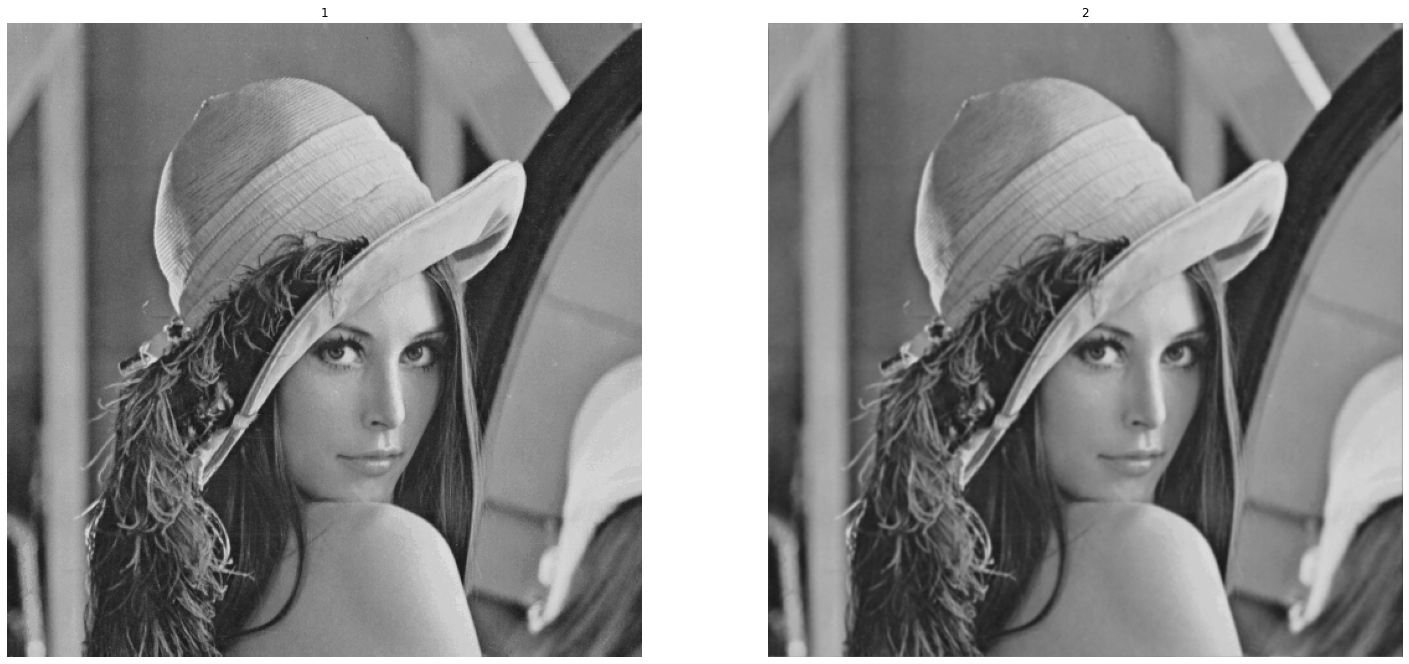

In [11]:
#create filtera
a = [[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]]
filtera = np.array(a)

h, w = filtera.shape
th, tw = img.shape # target width & height
y_start = ceil(th//2 - h/2)
y_end = floor(th//2 + h/2)
x_start = ceil(tw//2 - w/2)
x_end = floor(tw//2 + w/2)

#resize the filter
filtera_resized = np.zeros(img.shape, dtype='float64')
filtera_resized[y_start:y_end+1 , x_start:x_end+1] = filtera

#find the filter magnitude
filtera_mag, _ = fourier_transform(filtera_resized)

# Apply filter (calculate final magnitude)
final_mag = mag * filtera_mag

# Reconstruct the image
reconstructed = inverse_fourier_transform(final_mag, phase)

# Plot
img_mag_vis = visualize_magnitude(mag)
final_mag_vis = visualize_magnitude(final_mag)
# titles = ['Original Image', 'Image Magnitude', 'Final Magnitude', 'Result']
# imshow(img, img_mag_vis, final_mag_vis, reconstructed, figsize=30, title=titles)
imshow(img, reconstructed, title=['1','2'])

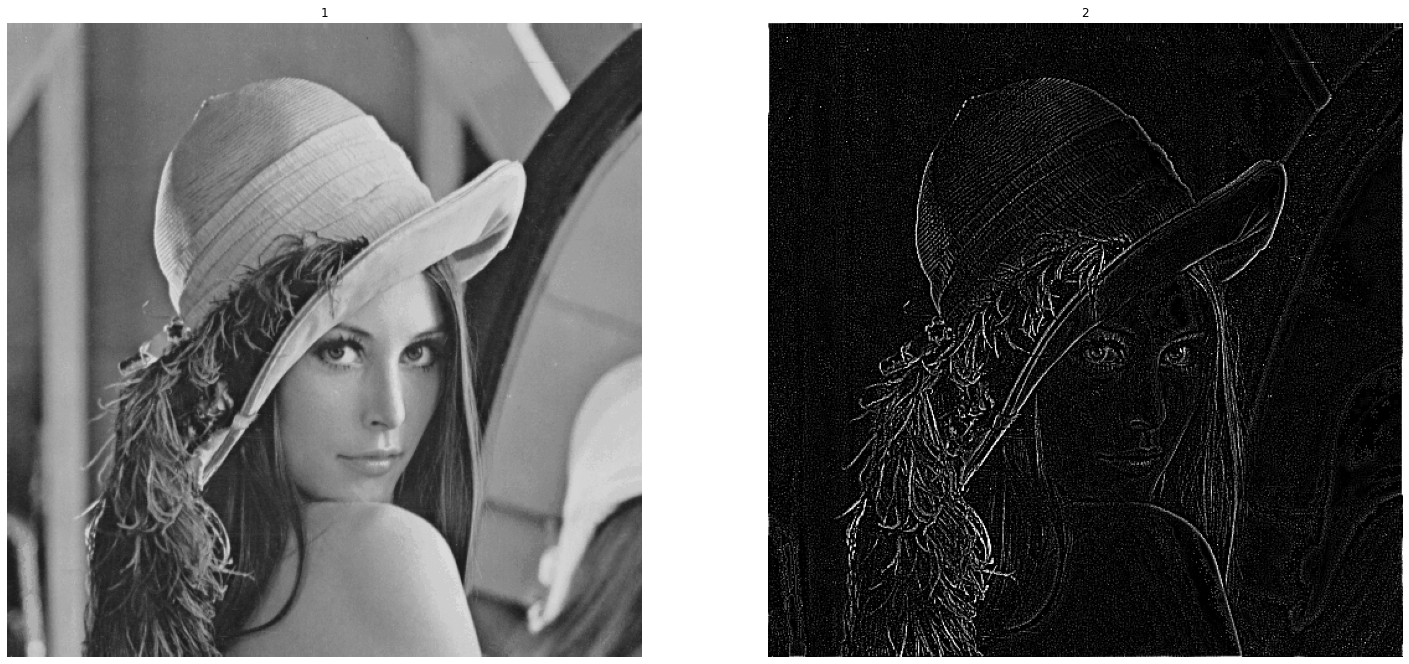

In [12]:
#create filterb
b = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
filterb = np.array(b)

h, w = filterb.shape
th, tw = img.shape # target width & height
y_start = ceil(th//2 - h/2)
y_end = floor(th//2 + h/2)
x_start = ceil(tw//2 - w/2)
x_end = floor(tw//2 + w/2)

#resize the filter
filterb_resized = np.zeros(img.shape, dtype='float64')
filterb_resized[y_start:y_end+1 , x_start:x_end+1] = filterb

#find the filter magnitude
filterb_mag, _ = fourier_transform(filterb_resized)

# Apply filter (calculate final magnitude)
final_mag = mag * filterb_mag

# Reconstruct the image
reconstructed = inverse_fourier_transform(final_mag, phase)

# Plot
img_mag_vis = visualize_magnitude(mag)
final_mag_vis = visualize_magnitude(final_mag)

imshow(img, reconstructed, title=['1','2'])

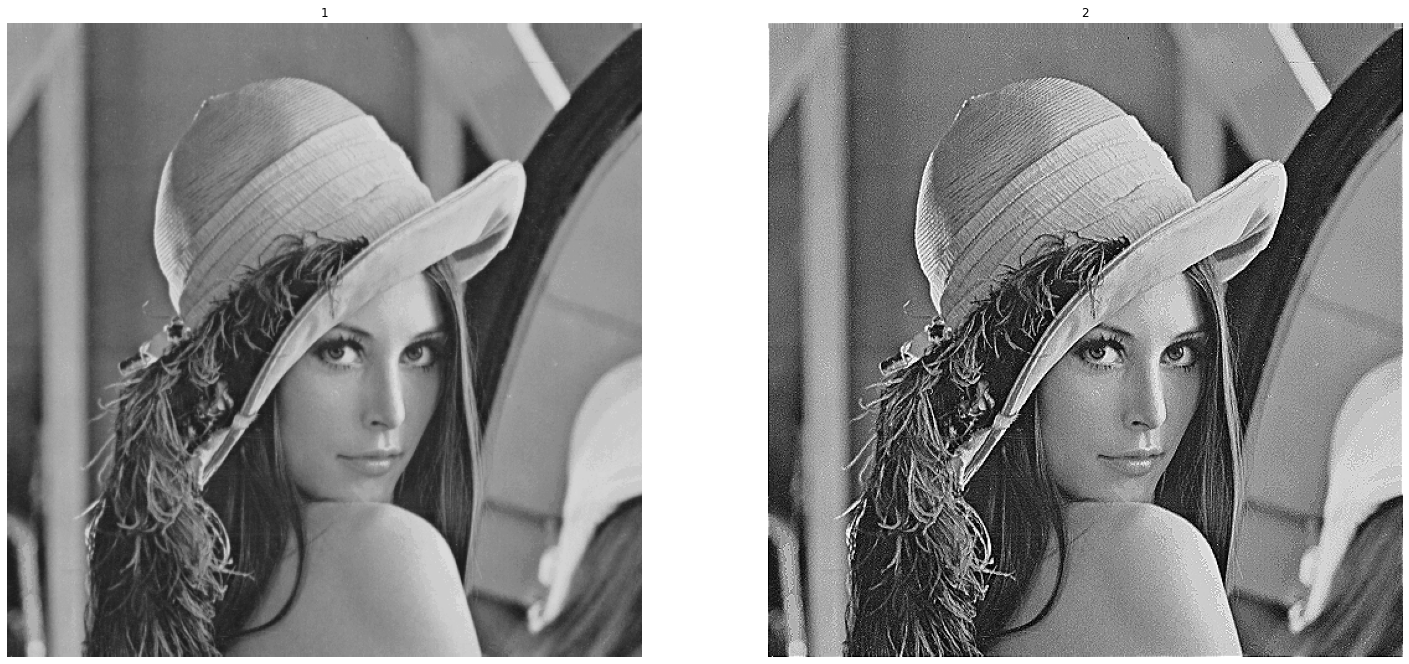

In [13]:
#create filterc
c = [[0,-1,0],[-1,5,-1],[0,-1,0]]
filterc = np.array(c)

h, w = filterc.shape
th, tw = img.shape # target width & height
y_start = ceil(th//2 - h/2)
y_end = floor(th//2 + h/2)
x_start = ceil(tw//2 - w/2)
x_end = floor(tw//2 + w/2)

#resize the filter
filterc_resized = np.zeros(img.shape, dtype='float64')
filterc_resized[y_start:y_end+1 , x_start:x_end+1] = filterc

#find the filter magnitude
filterc_mag, _ = fourier_transform(filterc_resized)

# Apply filter (calculate final magnitude)
final_mag = mag * filterc_mag

# Reconstruct the image
reconstructed = inverse_fourier_transform(final_mag, phase)

# Plot
img_mag_vis = visualize_magnitude(mag)
final_mag_vis = visualize_magnitude(final_mag)

imshow(img, reconstructed, title=['1','2'])

## 4.1.2

In [14]:
def fourier_transform_woutsh(image):
    fft = np.fft.fft2(image)
    magnitude, phase = np.abs(fft), np.angle(fft)
    return magnitude, phase

In [15]:
lena = cv2.imread("Images/4/Lena.bmp", cv2.IMREAD_GRAYSCALE)
bar = cv2.imread("Images/4/Barbara.bmp", cv2.IMREAD_GRAYSCALE)
f = cv2.imread("Images/4/F16.bmp", cv2.IMREAD_GRAYSCALE)
bab = cv2.imread("Images/4/Baboon.bmp", cv2.IMREAD_GRAYSCALE)

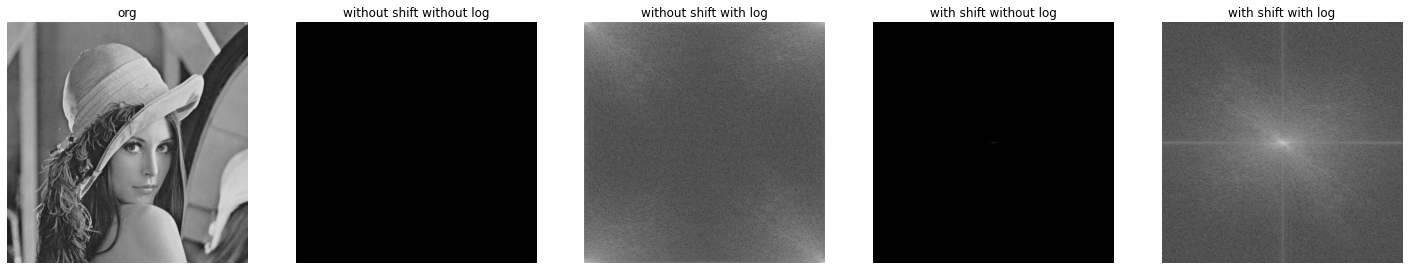

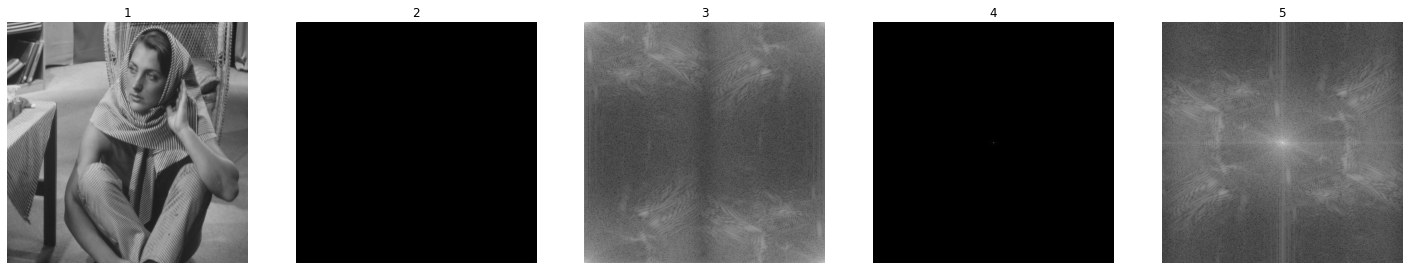

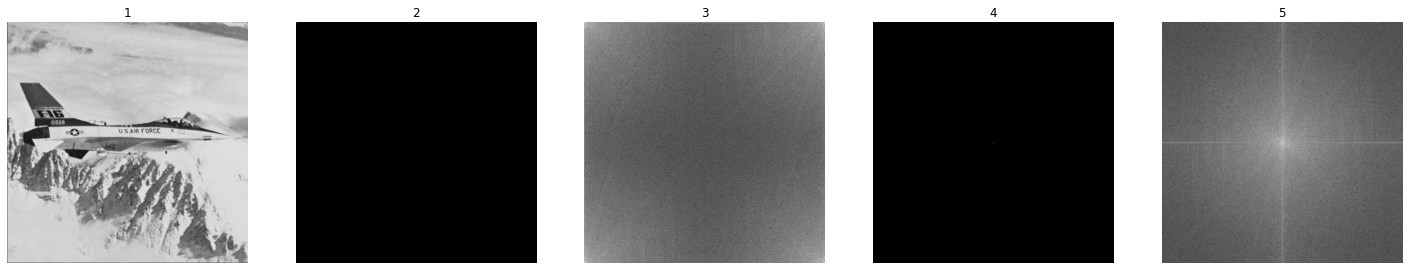

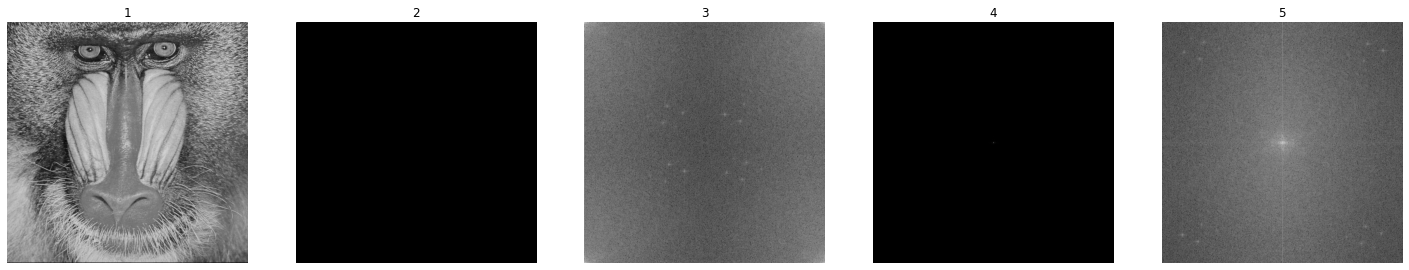

In [16]:
mag1, phase1 = fourier_transform(lena)
mag2, phase2 = fourier_transform(bar)
mag3, phase3 = fourier_transform(f)
mag4, phase4 = fourier_transform(bab)

mag12, phase12 = fourier_transform_woutsh(lena)
mag_normal12 = normalize(mag12)
mag_visual12 = visualize_magnitude(mag12)
mag22, phase22 = fourier_transform_woutsh(bar)
mag_normal22 = normalize(mag22)
mag_visual22 = visualize_magnitude(mag22)
mag32, phase32 = fourier_transform_woutsh(f)
mag_normal32 = normalize(mag32)
mag_visual32 = visualize_magnitude(mag32)
mag42, phase42 = fourier_transform_woutsh(bab)
mag_normal42 = normalize(mag42)
mag_visual42 = visualize_magnitude(mag42)

mag_normal1 = normalize(mag1)
mag_visual1 = visualize_magnitude(mag1)
mag_normal2 = normalize(mag2)
mag_visual2 = visualize_magnitude(mag2)
mag_normal3 = normalize(mag3)
mag_visual3 = visualize_magnitude(mag3)
mag_normal4 = normalize(mag4)
mag_visual4 = visualize_magnitude(mag4)

imshow(lena, mag_normal12, mag_visual12, mag_normal1, mag_visual1, title=['org', 'without shift without log', 'without shift with log', 'with shift without log', 'with shift with log'])
imshow(bar, mag_normal22, mag_visual22, mag_normal2, mag_visual2, title=['1', '2', '3', '4', '5'])
imshow(f, mag_normal32, mag_visual32, mag_normal3, mag_visual3, title=['1', '2', '3', '4', '5'])
imshow(bab, mag_normal42, mag_visual42, mag_normal4, mag_visual4, title=['1', '2', '3', '4', '5'])

## 4.2.1

## 4.2.2

In [17]:
bar = cv2.imread("Images/4/Barbara.bmp", cv2.IMREAD_GRAYSCALE)

In [18]:
def prog():
    mag, phase = fourier_transform(bar)
    
    
    reconstructed = inverse_fourier_transform(final_mag, phase)
    return reconstructed